In [1]:
from pathlib import Path
import pandas as pd
from nvi_survey import create_nvi_survey

filepath = (
    Path.cwd() /
    "output" /
    "nvi_2024_analysis_source_2026_2026_20250602.csv"
)
nvi = create_nvi_survey(filepath)

In [10]:
list(
    nvi.answer_key
    [nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"]
    ["question"].drop_duplicates()
)

['I do not feel comfortable doing any of these tasks',
 'Passing a basic computer skills test',
 'Printing and scanning documents',
 'Submitting an online job application',
 'Uploading documents',
 'Using a website builder',
 'Using communication and collaboration tools (Slack, Teams)',
 'Using email applications (Microsoft Outlook, Gmail)',
 'Using Microsoft Office, or Google applications (Word, Excel, PowerPoint, Docs, Sheets, or Slides)',
 'Using photo or video editing software',
 'Using software to analyze data',
 'Using video conferencing software (Zoom, Google Meet)',
 'Writing code']

In [2]:
(nvi.tabulate_multiselect("citywide", ..., "Hesitate_Reporting_Crime_Reason").T) / 4061

citywide,Detroit Overall
"Concern that I won't be taken seriously, or no action will be taken",0.299187
Fear of retaliation,0.237134
General distrust of law enforcement,0.188623
I would not hesitate or avoid reporting crime,0.512682
Other,0.045802
Risk of consequences from immigration (such as deportation),0.028811
Total Responses,1.0


In [44]:
def percentages(counts):
    return (
        (
            (100 * counts) 
            / (
                counts["Total Responses"]
                .values.reshape(-1,1)
            )
        )
        .round()
        .astype(pd.Int64Dtype())
    )

In [4]:
nvi.answer_key[nvi.answer_key["included_in_arpa"]]["group"].drop_duplicates()

0                          Access_Device
107    Comfortability_Using_Devices_Task
124               Concerns_Using_Devices
177    DigitalEquity_Sources_Information
247              Familiar_Tech_Resources
308        Importance_Using_Internet_For
370                     Internet_At_Home
375            Issues_Prevent_Use_Device
550         Programs_Affordable_Internet
603      Resources_Improve_Skills_Access
Name: group, dtype: object

In [6]:
((nvi.tabulate_multiselect("citywide", ..., "Comfortability_Using_Devices_Task").T) / 4061).to_clipboard()

In [51]:
counts = nvi.tabulate_single_question("citywide", "Currently_Employed")
percentages(counts)

Currently_Employed,In the city of Detroit?,Outside of Detroit?,Both,I am not currently employed,Total Responses
citywide,,,,,
Detroit Overall,39,14,9,38,100


In [8]:
counts = nvi.tabulate_multiselect("Currently_Employed", ..., "Comfortability_Using_Devices_Task", universe="Age!=6")

counts.to_csv("C:\\Users\\mike\\Desktop\\1_projects\\arpa_analysis\\currently_employed_summary_20250526.csv")

In [46]:
nvi.answer_key[
    nvi.answer_key["question"].str.lower().str.contains("employed")
][["group", "question"]].drop_duplicates()

,group,question
168,Currently_Employed,Currently_Employed


In [4]:
nvi.answer_key[
    nvi.answer_key["question"] == "Age"
]

,indicator_db_id,indicator_id,indicator_include,group,question,question_text,answer,survey_code,db_question_code,db_answer_code,tabulate,suppress_value,full_column,response_type,universe_query,site_category,included_in_arpa,and_or,start_date,end_date
17,<NA>,NaN,False,Age,Age,What is your age?,Prefer not to answer,7,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
18,<NA>,NaN,False,Age,Age,What is your age?,65 years or older,6,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
19,<NA>,NaN,False,Age,Age,What is your age?,55-64 years old,5,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
20,<NA>,NaN,False,Age,Age,What is your age?,45-54 years old,4,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
21,<NA>,NaN,False,Age,Age,What is your age?,35-44 years old,3,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
22,<NA>,NaN,False,Age,Age,What is your age?,25-34 years old,2,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
23,<NA>,NaN,False,Age,Age,What is your age?,18-24 years old,1,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN


In [5]:
counts = nvi.tabulate_single_question("Age", "Currently_Employed", universe="Age!=6")

In [6]:
counts / counts["Total Responses"].values.reshape(-1,1)

Currently_Employed,In the city of Detroit?,Outside of Detroit?,Both,I am not currently employed,Total Responses
Age,,,,,
18-24 years old,0.437838,0.156757,0.064865,0.340541,1.0
25-34 years old,0.530973,0.191740,0.091445,0.185841,1.0
35-44 years old,0.467143,0.195714,0.121429,0.215714,1.0
45-54 years old,0.471756,0.172519,0.109924,0.245802,1.0
55-64 years old,0.385694,0.123422,0.091164,0.399719,1.0
Prefer not to answer,0.314050,0.123967,0.033058,0.528926,1.0


In [57]:
counts / counts["Total Responses"].values.reshape(-1,1)

Currently_Employed,In the city of Detroit?,Outside of Detroit?,Both,I am not currently employed,Total Responses
Age,,,,,
18-24 years old,0.437838,0.156757,0.064865,0.340541,1.0
25-34 years old,0.530973,0.191740,0.091445,0.185841,1.0
35-44 years old,0.467143,0.195714,0.121429,0.215714,1.0
45-54 years old,0.471756,0.172519,0.109924,0.245802,1.0
55-64 years old,0.385694,0.123422,0.091164,0.399719,1.0
65 years or older,0.188345,0.047867,0.043704,0.720083,1.0
Prefer not to answer,0.314050,0.123967,0.033058,0.528926,1.0


In [64]:
table = (
    nvi
    .tabulate_single_question(
        "citywide", 
        "Detroit_Business_Ownership", 
        "Detroit_Business_Ownership"
    )
)

(table / table["Total Responses"].values.reshape(-1,1)).T.sort_values("Detroit Overall")

citywide,Detroit Overall
Detroit_Business_Ownership,
I own a business outside of Detroit,0.013151
"Yes, I own a business with a dedicated physical location outside my home (e.g. storefront)",0.025310
"Yes, I own a business that I run from my home or from a co-working space",0.153846
"No, I do not currently own a business in Detroit but I would like/plan to",0.259553
"No, I do not currently own a business in Detroit",0.548139
Total Responses,1.000000


In [31]:
nvi.tabulate_multiselect("citywide", ..., "In_The_Last_12_Months").T.sort_values("Detroit Overall")

citywide,Detroit Overall
Purchased a lot or lots near my home,276
Secured or improved vacant housing,360
Cleaned up or improved park/open spaces,1005
Cleaned up or improved lot(s) that I own,1050
Cleaned up or improved alley ways,1092
Cleaned up or improved lot(s) that I do not own,1227
I have not participated in any of these activities,1378
Total Responses,4061


In [16]:
nvi.compile_single_response_indicator(2, "district").sort_values("percentage")

,count,universe,percentage
district,,,
Council District 3,269,410,0.656098
Council District 7,330,502,0.657371
Council District 6,372,555,0.670270
Council District 4,425,619,0.686591
Council District 2,424,605,0.700826
Council District 1,431,614,0.701954
Council District 5,557,756,0.736772


In [52]:
nvi.answer_key[
    nvi.answer_key["group"].str.contains("Business")
]

,indicator_db_id,indicator_id,indicator_include,group,question,question_text,answer,survey_code,db_question_code,db_answer_code,tabulate,suppress_value,full_column,response_type,universe_query,site_category,included_in_arpa,and_or,start_date,end_date
86,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,More than 75%,5,<NA>,NaN,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
87,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,51-75%,4,<NA>,34,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
88,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,26-50%,3,<NA>,33,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
89,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,11-25%,2,<NA>,32,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
90,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,10% or less,1,<NA>,31,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
172,9,NaN,False,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,I own a business outside of Detroit,5,12,30,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
173,9,NaN,False,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"No, I do not currently own a business in Detro...",4,12,29,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
174,9,NaN,False,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"No, I do not currently own a business in Detroit",3,12,28,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
175,9,NaN,True,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"Yes, I own a business with a dedicated physica...",2,12,27,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
176,9,NaN,True,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"Yes, I own a business that I run from my home ...",1,12,26,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN


In [78]:
nvi.answer_key[nvi.answer_key["group"] == "Neighborhood_Conditions"]["question"]

Series([], Name: question, dtype: object)

In [91]:
nvi.tabulate_single_question("citywide", "Childcare_Prevent_Work_Meetings_Appointments", "Childcare_Prevent_Work_Meetings_Appointments").T

citywide,Detroit Overall
Childcare_Prevent_Work_Meetings_Appointments,
Never,449
Rarely,291
Sometimes,303
Often,203
Always,106
Total Responses,1352


In [90]:
nvi.compile_single_response_indicator(61, "district").sort_values("percentage")

,count,universe,percentage
district,,,
Council District 7,79,171,0.461988
Council District 4,87,183,0.475410
Council District 3,89,164,0.542683
Council District 1,108,198,0.545455
Council District 5,122,222,0.549550
Council District 6,120,204,0.588235
Council District 2,145,217,0.668203


In [12]:
nvi.tabulate_single_question("citywide", "district")

district,Council District 1,Council District 2,Council District 3,Council District 4,Council District 5,Council District 6,Council District 7,Total Responses
citywide,,,,,,,,
Detroit Overall,614,605,410,619,756,555,502,4061


In [10]:
nvi.tabulate_single_question("citywide", "Youth_in_Household_YesNo")

Youth_in_Household_YesNo,Yes,No,Total Responses
citywide,,,
Detroit Overall,1359,2684,4043


In [100]:
from nvi_etl.geo_reference import pull_zones


In [102]:
zones = pull_zones(2026)

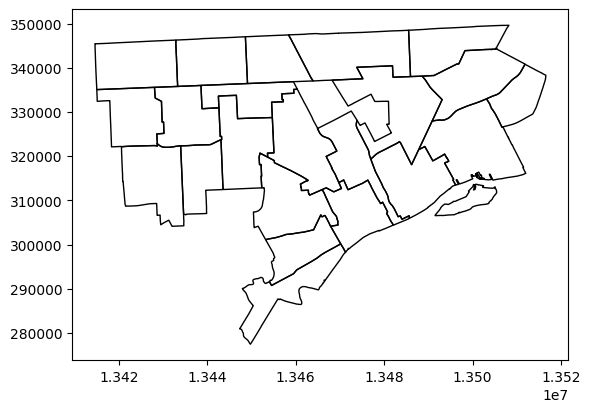

In [112]:
ax  = zones.plot(edgecolor="black", facecolor="none")  # or any styling you like
ax.get_figure().savefig("layer.svg", format="svg") 

In [6]:
frame = nvi.tabulate_single_question("district", "Age", "Age")

In [9]:
pd.concat([
    frame[[
        "18-24 years old",
        "25-34 years old",
    ]].sum(axis=1).rename("18-34 years old"),
    frame[[
        "35-44 years old",
        "45-54 years old",
    ]].sum(axis=1).rename("35-54 years old"),
    frame[["55-64 years old"]],
    frame[["65 years or older"]]
], axis=1).to_clipboard()

In [7]:
columns = (
    nvi.answer_key[
        nvi.answer_key["tabulate"]
        & (nvi.answer_key["group"] == "Race_And_Ethnicities")
    ]
)

aggregations = {col: "count" for col in columns["full_column"]}
rename = {row["full_column"]: row["question"] for _, row in columns.iterrows()}
aggregations["district"] = "size"

nvi.survey_data[
    ["district"]
    + list(columns["full_column"])
].groupby("district").agg(aggregations).rename(
    columns=rename,
    index={a: a-1 for a in range(2,9)}
)

,African American or Black,American Indian or Alaskan Native,Arab American or Middle Eastern,Asian/Native Hawaiian/Pacific Islander,Hispanic/Latino,Prefer not to answer,Some other race,White,district
district,,,,,,,,,
1,492,10,2,4,7,37,5,77,614
2,495,13,3,5,11,37,3,67,605
3,340,8,6,10,8,23,7,34,410
4,460,14,3,10,5,44,7,96,619
5,478,25,14,6,13,54,9,191,756
6,242,12,12,9,132,30,6,160,555
7,413,11,3,1,18,35,4,38,502


In [15]:
nvi.tabulate_multiselect(
    "Household_Annual_Income_Before_Taxes", 
    ..., 
    "Comfortability_Using_Devices_Task", 
    universe="Gender_Descriptions == 1"
).to_clipboard()

In [25]:
translation_table = nvi.answer_key[nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"][["question", "survey_code"]]

In [ ]:
counts = nvi.survey_data.query("Age != 6")[
    nvi.answer_key[
        nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"
    ]["full_column"]
].apply(lambda row: frozenset(row.dropna().values), axis=1).value_counts()

In [18]:
renamer = {row["full_column"]: row["survey_code"] for _, row in nvi.answer_key[
        nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"
    ][["full_column", "survey_code"]].iterrows()
}

nvi.survey_data.query("Age != 6")[
    nvi.answer_key[
        nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"
    ]["full_column"]
].agg(lambda df: df.count() / df.size).to_frame().rename(index=renamer, columns={0: "prob"}).to_csv("output/raw_probs.csv")

In [3]:
import seaborn as sn

<Axes: xlabel='count', ylabel='Count'>

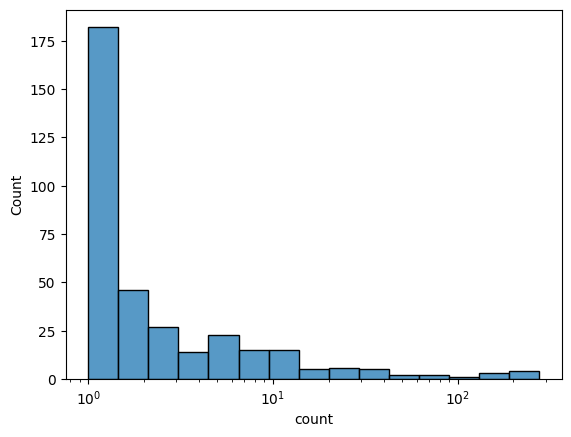

In [4]:
import numpy as np
sn.histplot(counts, log_scale=True)

In [5]:
counts

(1, 2, 3, 4, 5, 6, 7, 8)                   276
(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)    257
(13)                                       252
(1, 2, 3, 4, 5, 6, 7, 8, 12)               190
(1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12)       189
                                          ... 
(5, 7, 8, 9, 11)                             1
(1, 2, 5, 6, 12)                             1
(3, 8, 9, 10, 11, 12)                        1
(1, 2, 5, 6, 7, 8, 9, 11)                    1
(7, 8, 9, 10, 11, 12)                        1
Name: count, Length: 350, dtype: int64

In [6]:
# P(A and B) / P(A)

In [7]:
for_iter = counts.to_frame().reset_index()

In [8]:
from itertools import product
from collections import defaultdict

In [ ]:
choice_counts = defaultdict(int)
for _, row in for_iter.iterrows():
    for i in range(1,13):
        if i in row["index"]:
            choice_counts[i] += row["count"]

probabilities = {i: c / 4061 for i, c in choice_counts.items()}


pairs = filter(lambda x: x[0] != x[1], product(range(1,13), range(1,13)))

pair_counts = defaultdict(int)
for a, b in pairs:
    for _, row in for_iter.iterrows():
        if a in row["index"] and b in row["index"]:
            pair_counts[(a, b)] += row["count"]


association_matrix = np.zeros((12,12))

pairs = product(range(1,13), range(1,13))

for a, b in pairs:
    association_matrix[a-1,b-1] = (pair_counts[(a, b)] / 4061) / probabilities[a]

In [28]:
renamer = {
    r["survey_code"]: r["question"] for _, r in 
    nvi.answer_key[nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"].iterrows()
}

In [33]:
(
    pd.DataFrame(association_matrix, columns=range(1,13), index=range(1,13))
    .rename(index=renamer, columns=renamer)
    .to_clipboard()
)

<Axes: ylabel='Count'>

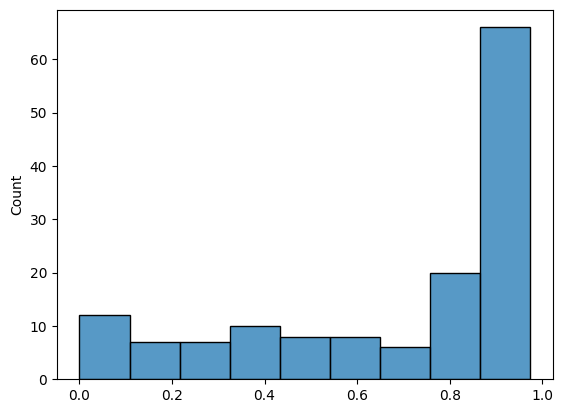

In [30]:
sn.histplot(association_matrix.flatten())

In [31]:
direction_matrix = association_matrix - association_matrix.T

dom = pd.DataFrame(enumerate(direction_matrix.sum(axis=1), start=1), columns=["survey_response_id", "dominance"])

In [32]:
dom

,survey_response_id,dominance
0,1,-3.213060
1,2,-2.571931
2,3,-2.685072
3,4,-2.900511
4,5,-1.999885
5,6,-2.658390
6,7,-2.046119
7,8,0.648531
8,9,6.698546
9,10,4.758594


In [39]:
direction_matrix.round()

array([[ 0., -0., -0.,  0., -0.,  0., -0., -0., -1., -1., -1., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0., -0., -0., -1., -1., -1., -0.],
       [ 0., -0.,  0.,  0., -0.,  0., -0., -0., -1., -1., -1., -0.],
       [-0., -0., -0.,  0., -0., -0., -0., -0., -1., -1., -1., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -1., -1., -1., -0.],
       [-0., -0., -0.,  0., -0.,  0., -0., -0., -1., -1., -1., -0.],
       [ 0.,  0.,  0.,  0., -0.,  0.,  0., -0., -1., -1., -1., -0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -0., -0., -0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., -0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0., -0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -0., -0.,  0.]])

<Axes: ylabel='Count'>

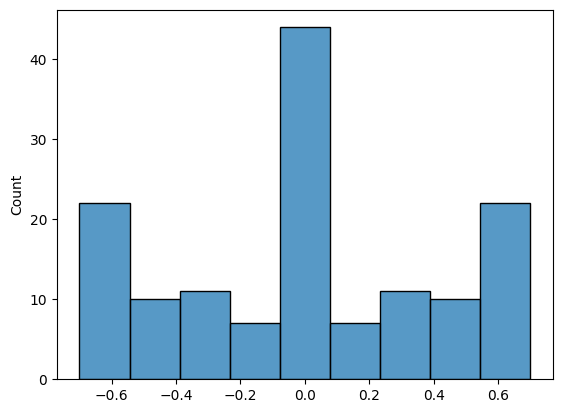

In [33]:
sn.histplot(direction_matrix.flatten())

One of the limitations of the Lightcast dataset is that each occupation doesn't associate with *every* skill that might be required for that occupation. They more often include occupation-specific skills, though possibly also 'cliche' skills like 'communication' or 'customer service.' Looking at tech skills specifically, many jobs will require 'computer literacy' or 'email' where other jobs like 'software development' won't, even though software developers probably are required to know how to use email.

The NVI survey can help us out because we have individual-level reporting of tech skills. For the purposes of ordering, we're trying to figure out when P(a | b) >> P(b | a). If the probability that you have skill a given that you have skill b is much high than the probability that you have skill b given that you have skill a, then you could think of skill b as the more 'advanced' tech skill. For example, the probability that you can use email given that you can write computer code is likely much higher than the probability you can write computer code given you know how to use email.

For each pair of skills, (a, b), we calculate P(a | b), where P(a | b) = P(a and b) / P(b).

We lay these conditional probabilities out into a matrix, with the a as the rows, and the columns, b.


In [60]:
threshold = 0.0

pairs = filter(lambda x: x[0] != x[1], product(range(1,13), range(1,13)))

result = defaultdict(set)

for a, b in pairs:
    if direction_matrix[a-1, b-1] > threshold:
        result[a].add(b)


result

defaultdict(set,
            {1: {4, 6},
             2: {1, 3, 4, 6},
             3: {1, 4, 6},
             5: {1, 2, 3, 4, 6, 7},
             6: {4},
             7: {1, 2, 3, 4, 6},
             8: {1, 2, 3, 4, 5, 6, 7},
             9: {1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12},
             10: {1, 2, 3, 4, 5, 6, 7, 8, 11, 12},
             11: {1, 2, 3, 4, 5, 6, 7, 8, 12},
             12: {1, 2, 3, 4, 5, 6, 7, 8}})

1. Get income data from lightcast
    a. Filter jobs to those with higher earnings
2. Use this calculated ordering

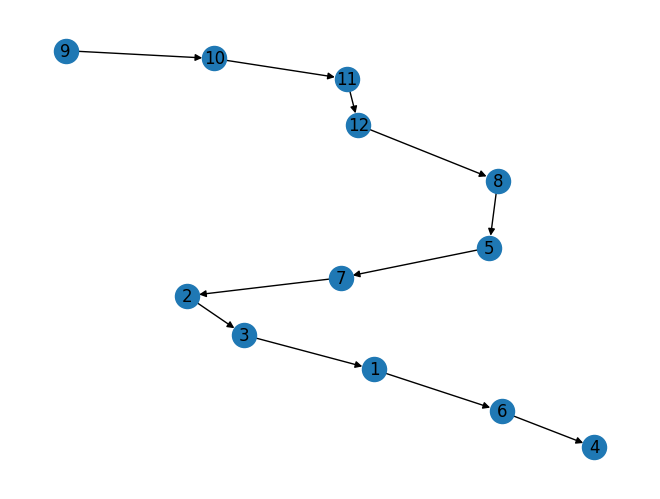

In [61]:
import networkx as nx

graph = nx.DiGraph(result)
reduced = nx.algorithms.transitive_reduction(graph)

nx.draw(reduced, with_labels=True)

In [57]:
translation_table

,question,survey_code
107,I do not feel comfortable doing any of these t...,13
108,Passing a basic computer skills test,2
109,Printing and scanning documents,3
110,Submitting an online job application,1
111,Uploading documents,4
112,Using a website builder,11
113,Using communication and collaboration tools (S...,8
114,"Using email applications (Microsoft Outlook, G...",6
115,"Using Microsoft Office, or Google applications...",5
116,Using photo or video editing software,12


In [69]:
(
    dom.merge(
        translation_table, 
        left_on="survey_response_id", 
        right_on="survey_code"
    ).sort_values("dominance")
)[["question", "dominance"]]

,question,dominance
3,Uploading documents,-3.052709
5,"Using email applications (Microsoft Outlook, G...",-3.013390
2,Printing and scanning documents,-2.967759
0,Submitting an online job application,-2.907277
1,Passing a basic computer skills test,-2.477193
6,"Using video conferencing software (Zoom, Googl...",-2.263107
4,"Using Microsoft Office, or Google applications...",-2.154208
7,Using communication and collaboration tools (S...,1.058232
11,Using photo or video editing software,1.880103
10,Using a website builder,4.485347


In [72]:
direction_matrix[:-1, :-1].sum(axis=1)

array([-2.4762554 , -2.06949048, -2.51934139, -2.59778051, -1.76644119,
       -2.55984059, -1.86728162,  1.158055  ,  6.05959569,  4.47510489,
        4.16367558])

In [4]:
from pathlib import Path
import configparser
import pandas as pd
import geopandas as gpd

survey_year = 2024
config = configparser.ConfigParser()
config.read(Path() / "conf" / ".conf")


survey_filename = config[f"nvi_{survey_year}_config"]["survey_responses"]
survey_data = pd.read_csv(survey_filename, low_memory=False)

geocoded_filename = config[f"nvi_{survey_year}_config"]["geocoded_responses"]
geocoded = pd.read_excel(geocoded_filename)

if len(geocoded) != len(survey_data):
    print(f"# geocoded rows don't match the original survey data!")

# Don't use any survey data from the geocoded file!
merged = survey_data.merge(
    geocoded[["USER_Response_ID", "Status", "X", "Y"]]
    .rename(columns={"Status": "successful_geocode"}), 
    left_on="Response ID", right_on="USER_Response_ID"
)

# Create the geodataframe in the D3-standard projection 'EPSG:2898'
responses = gpd.GeoDataFrame(
    merged, 
    geometry=gpd.points_from_xy(merged["X"], merged["Y"]), 
    crs="EPSG:4326"
).to_crs("EPSG:2898")



In [26]:
from nvi_etl.geo_reference import pull_cdo_boundaries, pull_city_boundary

cdo_boundaries = pull_cdo_boundaries()
city_boundary = pull_city_boundary()

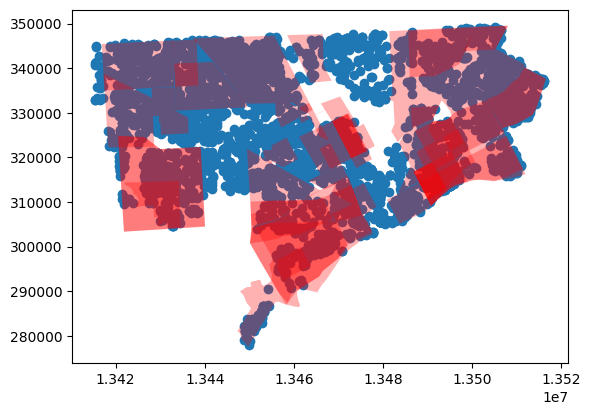

In [32]:
ax = responses[responses.geometry.intersects(city_boundary.iloc[0].geometry)].plot()
ax = cdo_boundaries.to_crs("EPSG:2898").plot(ax=ax, alpha=0.3, color="red")

In [49]:
joined = responses.sjoin(cdo_boundaries.to_crs(2898), how="left", predicate="within")

joined["organization_name"].isna().sum()

np.int64(952)

In [10]:
cdo_boundaries

,organization_name,annual_budget,fte,year_founded,cfcfreq,resengagem,econdevfre,resspprtfr,complanadv,general_lo,...,labelfordi,orgid,cnldstform,area_sqmil,sourceyr,shape_leng,shape_area,geometry,start_date,end_date
0,Cody Rouge Community Action Alliance,575000.0,4.0,2007.0,5.0,5.0,2.5,5.0,4.0,Far West Side,...,34,78.0,7.0,12.610830,2019.0,77025.283198,3.515698e+08,"POLYGON ((-83.26644 42.38603, -83.24499 42.385...",2025-01-01,2199-01-01
1,Joy Southfield Community Development Corporation,365000.0,7.0,2005.0,2.0,1.0,5.0,3.0,4.0,Far West Side,...,33,82.0,7.0,12.621348,2019.0,77058.555489,3.518630e+08,"POLYGON ((-83.19807 42.37854, -83.19546 42.329...",2025-01-01,2199-01-01
2,Vanguard Community Development Corporation,800000.0,7.0,1996.0,2.0,4.0,5.0,1.0,3.0,Greater Downtown,...,21,47.0,5.0,1.697375,2019.0,31331.616159,4.732011e+07,"POLYGON ((-83.08837 42.39268, -83.07488 42.397...",2025-01-01,2199-01-01
3,Woodbridge Neighborhood Development Corporation,200000.0,1.0,2002.0,5.0,4.0,2.0,1.0,5.0,Greater Downtown,...,25,56.0,6.0,0.664249,2019.0,17774.710779,1.851821e+07,"POLYGON ((-83.09008 42.34925, -83.08676 42.354...",2025-01-01,2199-01-01
4,Central Detroit Christian Community Developmen...,3000000.0,25.0,1993.0,1.0,4.0,4.0,4.0,3.0,Lower East Side,...,23,53.0,5.0,3.987022,2019.0,42443.828726,1.111518e+08,"POLYGON ((-83.11636 42.38388, -83.07553 42.397...",2025-01-01,2199-01-01
5,Detroit Catholic Pastoral Alliance,471120.0,3.0,1967.0,3.0,2.0,5.0,5.0,4.0,Lower East Side,...,17,37.0,5.0,0.295094,2019.0,12363.944715,8.226748e+06,"POLYGON ((-83.00344 42.37976, -83.00905 42.387...",2025-01-01,2199-01-01
6,Eastside Community Network,1900000.0,15.0,1984.0,0.0,0.0,0.0,0.0,0.0,Lower East Side,...,13,34.0,4.0,12.860473,2019.0,78953.303826,3.585294e+08,"POLYGON ((-83.0334 42.37892, -83.02945 42.3841...",2025-01-01,2199-01-01
7,Genesis Harbor of Opportunities Promoting Exce...,150000.0,1.0,2008.0,5.0,4.0,3.0,2.5,5.0,Lower East Side,...,19,46.0,5.0,1.186199,2019.0,23131.983894,3.306934e+07,"POLYGON ((-83.0216 42.36126, -83.00609 42.3669...",2025-01-01,2199-01-01
8,Mack Avenue Community Church Community Develop...,350000.0,7.0,2010.0,2.0,4.0,5.0,3.0,4.0,Lower East Side,...,16,39.0,5.0,3.590360,2019.0,40576.347978,1.000935e+08,"POLYGON ((-82.98384 42.38723, -82.97059 42.366...",2025-01-01,2199-01-01
9,The Villages Community Development Corporation,100000.0,1.0,2006.0,2.0,2.0,3.0,3.0,4.0,Lower East Side,...,18,40.0,5.0,2.617366,2025.0,36099.362504,7.296798e+07,"POLYGON ((-83.0216 42.36126, -82.99755 42.3704...",2025-01-01,2199-01-01


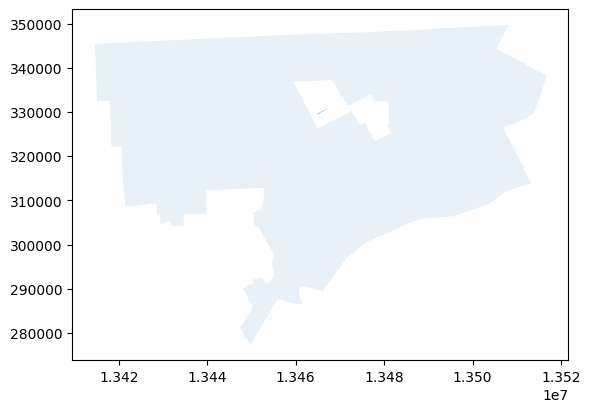

In [47]:
ax = cdo_boundaries[cdo_boundaries["organization_name"] == "Avalon Village"].to_crs(2898).plot()
ax = city_boundary.to_crs(2898).plot(ax=ax, alpha=0.1)

In [15]:
cdos = long[~long["location_id"].str.isnumeric()]
len(cdos)

16005